In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [3]:
#Load the data set
claimants = pd.read_csv("C:\\Users\\Bhanupriya\\Desktop\\DS\\Day 15 Logistic Regression\\Dataset\\claimants.csv")
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [4]:
# dropping the case number columns as it is not required
claimants.drop(["CASENUM"],inplace=True,axis=1)

In [5]:
#Shape of the data set
claimants.shape
claimants.head()
claimants.info()
claimants.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1328 non-null   float64
 2   CLMINSUR  1299 non-null   float64
 3   SEATBELT  1292 non-null   float64
 4   CLMAGE    1151 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [6]:
# Removing NA values in data set
claimants = claimants.dropna()


In [7]:
claimants.isna().sum()
claimants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1096 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1096 non-null   int64  
 1   CLMSEX    1096 non-null   float64
 2   CLMINSUR  1096 non-null   float64
 3   SEATBELT  1096 non-null   float64
 4   CLMAGE    1096 non-null   float64
 5   LOSS      1096 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 59.9 KB


In [8]:
# Dividing our data into input and output variables 
X = claimants.iloc[:,1:]
Y = claimants.iloc[:,0]

In [9]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\Bhanupriya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
#Predict for X dataset
y_pred = classifier.predict(X)
y_pred_prob=classifier.predict_proba(X)
y_pred_prob

array([[9.99996976e-01, 3.02430089e-06],
       [4.91052901e-01, 5.08947099e-01],
       [4.24341949e-01, 5.75658051e-01],
       ...,
       [2.61136024e-01, 7.38863976e-01],
       [7.12616815e-01, 2.87383185e-01],
       [3.19711722e-01, 6.80288278e-01]])

In [24]:
y_pred_df= pd.DataFrame({'actual':Y,
                         'predicted':y_pred,'prob[0]':y_pred_prob[:,0],'prob[1]':y_pred_prob[:,1]})
y_pred_df



,actual,predicted,prob[0],prob[1]
0,0,0,0.999997,0.000003
1,1,1,0.491053,0.508947
2,1,1,0.424342,0.575658
3,0,0,0.500500,0.499500
4,1,1,0.358977,0.641023
...,...,...,...,...
1334,1,1,0.287921,0.712079
1336,0,0,0.574638,0.425362
1337,1,1,0.261136,0.738864
1338,0,0,0.712617,0.287383


In [12]:
pd.crosstab(y_pred_df.actual,y_pred_df.predicted)


predicted,0,1
actual,,
0,381,197
1,123,395


In [18]:
#prop of majority class
max(claimants.ATTORNEY.value_counts())/len(claimants.ATTORNEY)




0.5273722627737226

In [13]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_pred_df.actual,y_pred_df.predicted)
accuracy=accuracy_score(y_pred_df.actual,y_pred_df.predicted)
print (cm,accuracy)

[[381 197]
 [123 395]] 0.708029197080292


In [21]:
TN=cm[0,0]
TP=cm[1,1]
FP=cm[0,1]
FN=cm[1,0]
sensitivity=TP/(TP+FN)
specificity=TN/(TN+FP)
Precision_p=TP/(TP+FP)
Precision_n=TN/(TN+FN)
print(sensitivity,specificity,Precision_p,Precision_n)

0.7625482625482626 0.6591695501730104 0.6672297297297297 0.7559523809523809


In [19]:
import numpy as np
Accuracy= np.sum([cm[0,0],cm[1,1]])/np.sum(cm)
print(Accuracy)

0.708029197080292


In [22]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_pred_df.actual,y_pred_df.predicted))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



In [ ]:
# ROC Curve

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])

df_new=pd.DataFrame({"fpr":fpr,"tpr":tpr,"cutoff":thresholds})
df_new[df_new["tpr"]>=0.60]


,fpr,tpr,cutoff
184,0.209343,0.604247,5.918156e-01
185,0.214533,0.604247,5.908284e-01
186,0.214533,0.606178,5.906559e-01
187,0.219723,0.606178,5.901106e-01
188,0.219723,0.611969,5.880676e-01
...,...,...,...
444,0.920415,0.996139,4.429983e-02
445,0.920415,0.998069,4.271403e-02
446,0.929066,0.998069,2.234620e-02
447,0.929066,1.000000,2.074783e-02


Text(0, 0.5, 'True Positive Rate')

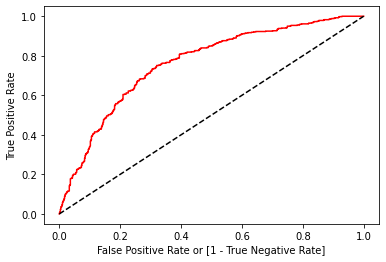

In [29]:
auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [30]:
auc

0.7108589063606365

In [36]:
prob=classifier.predict_proba(X)
prob=prob[:,1]

new_pred= pd.DataFrame({'actual': Y,"pred":0})
new_pred
new_pred.loc[prob>0.59,"pred"]=1
new_pred

,actual,pred
0,0,0
1,1,0
2,1,0
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [37]:
cm_new=confusion_matrix(new_pred.actual,new_pred.pred)
print(cm_new)
print(classification_report(new_pred.actual,new_pred.pred))


[[451 127]
 [204 314]]
              precision    recall  f1-score   support

           0       0.69      0.78      0.73       578
           1       0.71      0.61      0.65       518

    accuracy                           0.70      1096
   macro avg       0.70      0.69      0.69      1096
weighted avg       0.70      0.70      0.70      1096

